# 第１章　基本的なクラスタリングを行う10本ノック

## ノック1:k-meansで非階層型クラスタリングを実施してみよう




In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

In [2]:
iris.data.shape

(150, 4)

In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


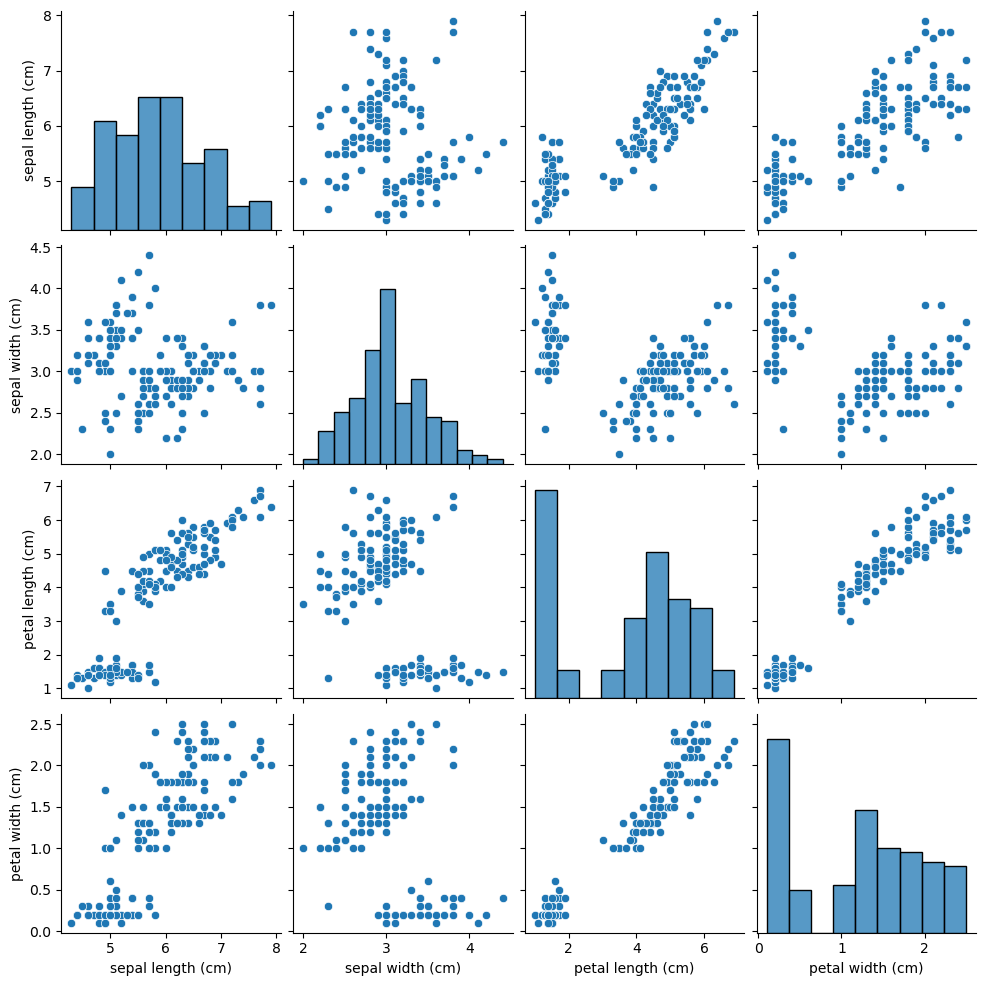

In [6]:
import seaborn as sns
df_temp = df_iris.copy()
sns.pairplot(df_temp)

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, init="random")
cls_data = df_iris.copy()
model.fit(cls_data)

KMeans(init='random', n_clusters=3, random_state=0)

In [8]:
cluster = model.predict(cls_data)
print(cluster)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


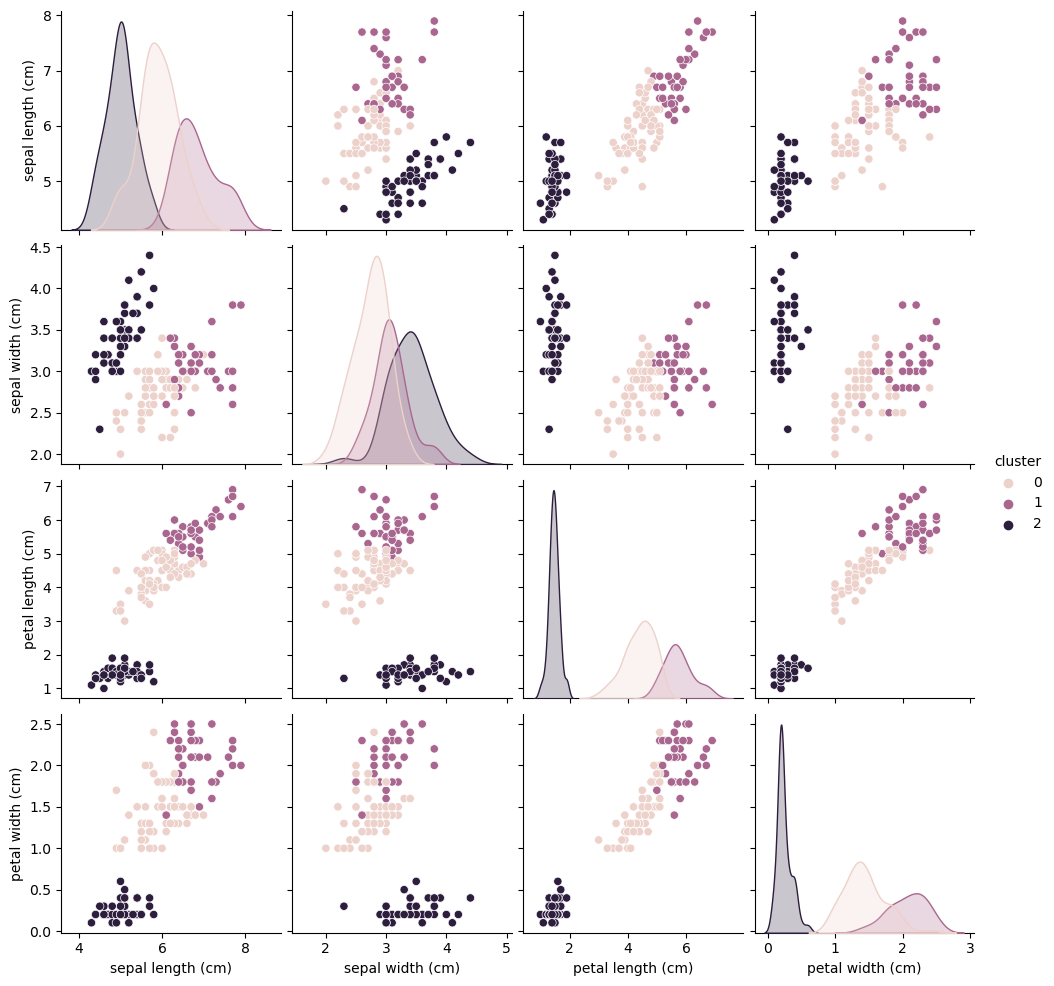

In [9]:
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue="cluster")

In [10]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,6.850000,3.073684,5.742105,2.071053
2,5.006000,3.428000,1.462000,0.246000


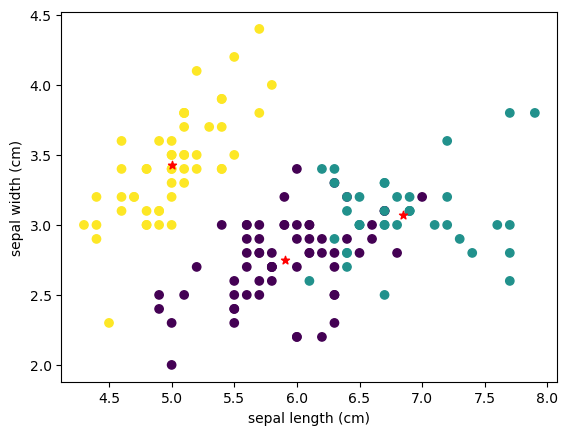

In [11]:
plt.scatter(cls_data["sepal length (cm)"], cls_data["sepal width (cm)"], c=cls_data["cluster"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(cluster_center["sepal length (cm)"], cluster_center["sepal width (cm)"], marker="*", color="red")

In [12]:
display(cls_data.groupby("cluster").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.90,2.75,4.39,1.43
1,6.85,3.07,5.74,2.07
2,5.01,3.43,1.46,0.25


In [13]:
cls_data["target"] = iris.target
cls_data.loc[cls_data["target"]==0, "target"] =  "setosa"
cls_data.loc[cls_data["target"]==1, "target"] =  "versicolor"
cls_data.loc[cls_data["target"]==2, "target"] =  "virginia"
display(cls_data.groupby("target").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,2.00
versicolor,5.94,2.77,4.26,1.33,0.04
virginia,6.59,2.97,5.55,2.03,0.72


## ノック2:クラスタリングの結果を評価してみよう

## ノック3:k-means++で非階層型クラスタリングを実施してみよう




## ノック4:エルボー法で最適なクラスター数を探索してみよう  




## ノック5:シルエット分析で最適なクラスター数を探索してみよう




## ノック6:階層型クラスタリングを実施してみよう

## ノック7:樹形図(デンドログラム)を解釈してみよう

## ノック8:最短距離法で階層型クラスタリングを実施してみよう

## ノック9:最長距離法で階層型クラスタリングを実施してみよう

## ノック10:群平均法で階層型クラスタリングを実施してみよう